In [1]:
import numpy as np                         
import matplotlib                          
import matplotlib.pyplot as plt       
import pykat.optics.maps as pkm
from pykat import finesse                 
from pykat.commands import *               
from pykat.optics.maps import *            
from IPython.display import display, HTML


%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.2.1           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [3]:
kat = pykat.finesse.kat()
kat.verbose=False
kat.parse("""
l laser 1 0 0 n0
s s0 1 n0 nmod1

mod eom 60M 0.3 1 pm nmod1 nmod2
s s1 0 nmod2 n1

m1 ITM 0.014 3.75e-05 0 n1 n2
s sCav 3994.4692 n2 n3
m1 ETM 5e-06 3.75e-05 -35 n3 n4

#higher order mode TEM33
tem laser 0 0 0.0 0.0
tem laser 3 3 1.0 0.0

#Gaussian model
cav cavity ITM n2 ETM n3
attr ITM Rc -1934.0
attr ETM Rc 2245.0

maxtem 6

pd Pcirc n3
pd1 PDH 60M 0 n1
""")

In [9]:
def PDHsignal(filename):
    k1 = kat.deepcopy()
    k1.parse("""xaxis ETM phi lin -120 50 400
                map ETM """+str(filename))
    fig,(ax1,ax2) =plt.subplots(2,1,figsize=(8,6),sharex=True)
    out=k1.run()
    ax1.plot(out.x,out["Pcirc"])
    ax1.set_ylabel("Circulating power")
    ax2.plot(out.x,out["PDH"])
    ax2.set_xlabel('ETM tuning [deg]')
    ax2.set_ylabel('PDH Error Signal')
    ax2.set_title("mapFile={}".format(filename))

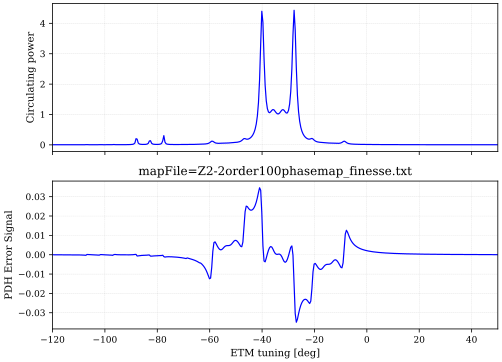

In [10]:
PDHsignal('Z2-2order100phasemap_finesse.txt')